# Render Classic Tempest Vertex Objects

In [13]:
#Import libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [21]:
colors = {
    -1: "pink",
    0: "white",
    240: "red",
    143: "green",
    15: "yellow",
    255: "purple",
    136: "grey",
    128: "navy",
    43: "cyan"
}

def getVerticesAndConns(l, color="blue"):
    i = 0
    vertices = []
    while l[i]:
        x,y,z = l[i],l[i+1],l[i+2]
        i+=3
        conns = []
        while l[i]:
            if l[i] == -1:
                i+=1
                color = colors[l[i]]
            else:
                conns+=[(l[i],color)]
            i+=1
        vertices += [((x,y,z),conns)]
        i+=1
    return vertices

def plotObject(number, vertices):
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection='3d')
    ax.view_init(azim=135,elev=20,vertical_axis="y")
    ax.yaxis.set_inverted(True) 
    ax.xaxis.set_inverted(True) 
    ax.xaxis.set_pane_color("black")
    ax.yaxis.set_pane_color("black")
    ax.zaxis.set_pane_color("black")
    plt.rcParams['grid.color'] = "navy"

    for (x,y,z),conns in vertices:
        for conn,color in conns:
            x1,y1,z1 = vertices[conn-1][0]
            xs = np.array([[x,x1]])
            ys = np.array([[y,y1]])
            zs = np.array([[z,z1]])
            ax.plot_wireframe(xs,ys,zs,color=color,linewidth=3.0)

    plt.savefig(f"vector_images/vec_image_plot_{number}.png", bbox_inches='tight')


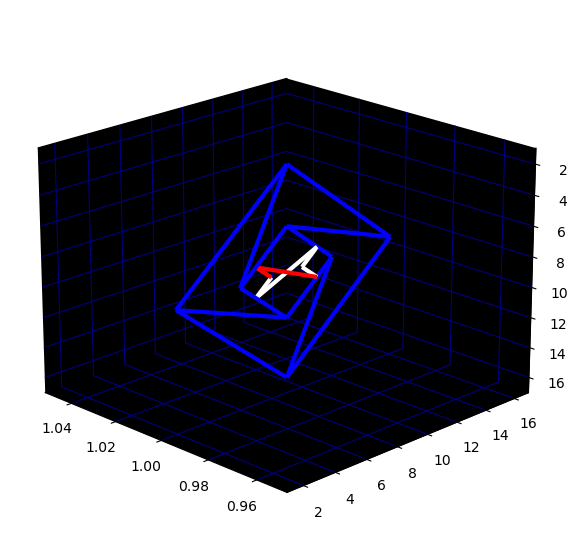

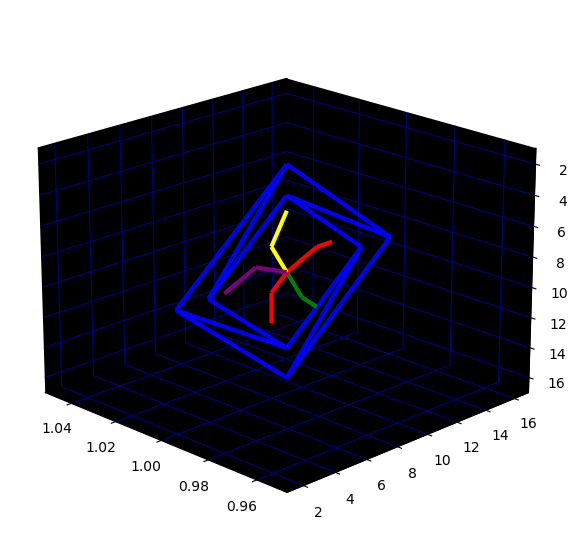

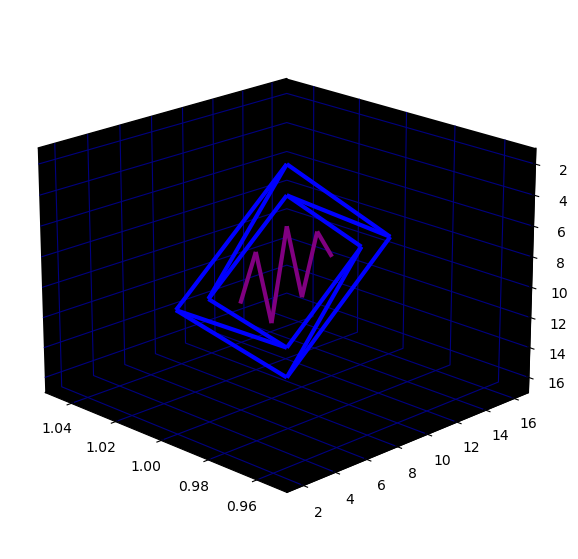

In [22]:
enemies = """
fliptank:
        dc.b 2,9,1,2,7,4,0
        dc.b 9,16,1,8,3,0
        dc.b 16,9,1,4,5,0
        dc.b 9,2,1,6,0
        dc.b 9,6,1,6,8,0
        dc.b 6,9,1,7,0
        dc.b 9,12,1,8,-1,240,0
        dc.b 12,9,1,0
        dc.b 7,8,1,10,14,-1,0,0
        dc.b 11,10,1,11,0
        dc.b 10,9,1,12,0
        dc.b 11,8,1,13,0
        dc.b 7,10,1,14,0
        dc.b 8,9,1,0,0

fusetank: dc.b 2,9,1,2,7,4,0
        dc.b 9,16,1,8,3,0
        dc.b 16,9,1,4,5,0
        dc.b 9,2,1,6,0
        dc.b 9,4,1,6,8,0
        dc.b 4,9,1,7,0
        dc.b 9,14,1,8,-1,240,0
        dc.b 14,9,1,0
        dc.b 9,9,1,10,0
        dc.b 8,10,1,11,0
        dc.b 8,12,1,0
        dc.b 10,11,1,-1,143,9,13,0
        dc.b 11,12,1,0
        dc.b 11,8,1,-1,240,9,15,0
        dc.b 12,8,1,0
        dc.b 8,7,1,-1,15,9,17,0
        dc.b 9,5,1,0
        dc.b 7,8,1,-1,255,9,19,0
        dc.b 5,9,1,0,0

pulstank: dc.b 2,9,1,2,7,4,0
        dc.b 9,16,1,8,3,0
        dc.b 16,9,1,4,5,0
        dc.b 9,2,1,6,0
        dc.b 9,4,1,6,8,0
        dc.b 4,9,1,7,0
        dc.b 9,14,1,8,-1,255,0
        dc.b 14,9,1,0
        dc.b 6,10,1,10,0
        dc.b 7,7,1,11,0
        dc.b 8,12,1,12,0
        dc.b 9,6,1,13,0
        dc.b 10,11,1,14,0
        dc.b 11,7,1,15,0
        dc.b 12,9,1,0,0
"""
d = enemies
ls = [[int(x) for x in ','.join([x for x in p.split() if ',' in x]).split(',')]
     for p in d.split('\n\n')]
for i,l in enumerate(ls):
    vertices = getVerticesAndConns(l)
    plotObject(i,vertices)